In [1]:
import pandas as pd
import glob
import numpy as np
import spotipy
import config as cfg
from spotipy.oauth2 import SpotifyOAuth
#use relative paths to load json files into a list
json_files = glob.glob("./Streaming_History_Audio*.json")

data = []

# Loop through the JSON files and read each one into a DataFrame
for f in json_files:
    df = pd.read_json(f)
    data.append(df)
    
df = pd.concat(data)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 139573 entries, 0 to 9293
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 139573 non-null  object
 1   username                           139573 non-null  int64 
 2   platform                           139573 non-null  object
 3   ms_played                          139573 non-null  int64 
 4   conn_country                       139573 non-null  object
 5   ip_addr_decrypted                  139573 non-null  object
 6   user_agent_decrypted               138263 non-null  object
 7   master_metadata_track_name         139339 non-null  object
 8   master_metadata_album_artist_name  139339 non-null  object
 9   master_metadata_album_album_name   139339 non-null  object
 10  spotify_track_uri                  139339 non-null  object
 11  episode_name                       44 non-null      ob

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id = cfg.spotify['client_id'], client_secret =cfg.spotify['client_secret'], redirect_uri = cfg.spotify['redirect_uri'] ))

In [3]:
df.isnull().sum()

ts                                        0
username                                  0
platform                                  0
ms_played                                 0
conn_country                              0
ip_addr_decrypted                         0
user_agent_decrypted                   1310
master_metadata_track_name              234
master_metadata_album_artist_name       234
master_metadata_album_album_name        234
spotify_track_uri                       234
episode_name                         139529
episode_show_name                    139529
spotify_episode_uri                  139529
reason_start                              0
reason_end                                0
shuffle                                   0
skipped                               86581
offline                                   0
offline_timestamp                         0
incognito_mode                            0
dtype: int64

In [4]:
df = df.drop(columns=["episode_name","episode_show_name","spotify_episode_uri",'username','ip_addr_decrypted','platform','offline_timestamp','incognito_mode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139573 entries, 0 to 9293
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 139573 non-null  object
 1   ms_played                          139573 non-null  int64 
 2   conn_country                       139573 non-null  object
 3   user_agent_decrypted               138263 non-null  object
 4   master_metadata_track_name         139339 non-null  object
 5   master_metadata_album_artist_name  139339 non-null  object
 6   master_metadata_album_album_name   139339 non-null  object
 7   spotify_track_uri                  139339 non-null  object
 8   reason_start                       139573 non-null  object
 9   reason_end                         139573 non-null  object
 10  shuffle                            139573 non-null  bool  
 11  skipped                            52992 non-null   ob

In [5]:
df.isnull().sum()

ts                                       0
ms_played                                0
conn_country                             0
user_agent_decrypted                  1310
master_metadata_track_name             234
master_metadata_album_artist_name      234
master_metadata_album_album_name       234
spotify_track_uri                      234
reason_start                             0
reason_end                               0
shuffle                                  0
skipped                              86581
offline                                  0
dtype: int64

In [6]:
df.dropna(subset=['master_metadata_track_name'], inplace=True)

In [7]:
df.isnull().sum()

ts                                       0
ms_played                                0
conn_country                             0
user_agent_decrypted                  1307
master_metadata_track_name               0
master_metadata_album_artist_name        0
master_metadata_album_album_name         0
spotify_track_uri                        0
reason_start                             0
reason_end                               0
shuffle                                  0
skipped                              86539
offline                                  0
dtype: int64

In [8]:
df

,ts,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline
0,2012-08-31T17:21:11Z,21966,US,unknown,Kill Shit,Krizz Kaliko,Kickin' & Screamin',spotify:track:3eMfBkKz0ZuffMqIVHhNr1,,,False,True,False
1,2012-08-31T17:30:20Z,454489,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,,trackdone,False,False,False
2,2012-08-31T17:31:17Z,59112,US,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,False,True,False
3,2012-08-31T17:35:54Z,261453,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,backbtn,trackdone,False,False,False
4,2012-08-31T17:36:17Z,22923,US,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9289,2023-07-31T21:18:24Z,5210,US,unknown,Vampire,Brooklane,Vampire,spotify:track:6ljnm3mEA1vzcRjwydZonk,playbtn,endplay,False,1.0,False
9290,2023-07-31T21:18:26Z,1540,US,unknown,Catalina Fight Song,Joyce Manor,Never Hungover Again,spotify:track:2TqfK2N1kFoX7OySPCB7pQ,clickrow,endplay,False,1.0,False
9291,2023-07-31T21:18:27Z,1050,US,unknown,What's Up?,Mom Jeans.,Sweet Tooth,spotify:track:141alNiSd9vG4Lb22BLHWM,clickrow,endplay,False,1.0,False
9292,2023-07-31T21:18:33Z,6950,US,unknown,"Thinking of You,",Microwave,Split,spotify:track:0wWtrTfTPmdT41WzzvCjhc,clickrow,endplay,False,1.0,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139339 entries, 0 to 9293
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 139339 non-null  object
 1   ms_played                          139339 non-null  int64 
 2   conn_country                       139339 non-null  object
 3   user_agent_decrypted               138032 non-null  object
 4   master_metadata_track_name         139339 non-null  object
 5   master_metadata_album_artist_name  139339 non-null  object
 6   master_metadata_album_album_name   139339 non-null  object
 7   spotify_track_uri                  139339 non-null  object
 8   reason_start                       139339 non-null  object
 9   reason_end                         139339 non-null  object
 10  shuffle                            139339 non-null  bool  
 11  skipped                            52800 non-null   ob

In [10]:
df['conn_country'].unique()

array(['US', 'ZZ', 'GD', 'QA', 'ET', 'CA', 'AU'], dtype=object)

In [11]:
df["reason_start"].unique()

array(['', 'trackdone', 'backbtn', 'fwdbtn', 'unknown', 'popup',
       'clickrow', 'uriopen', 'playbtn', 'appload', 'remote',
       'trackerror', 'clickside', 'endplay'], dtype=object)

In [12]:
df["reason_end"].unique()

array(['', 'trackdone', 'backbtn', 'fwdbtn', 'endplay', 'unknown',
       'popup', 'clickrow', 'uriopen', 'remote', 'clickside', 'appload',
       'trackerror', 'logout', 'unexpected-exit-while-paused',
       'unexpected-exit'], dtype=object)

In [13]:
df['skipped'].unique()

array([True, False, nan], dtype=object)

In [14]:
df['user_agent_decrypted'].unique()

array(['unknown',
       'Mozilla%2f5.0%20(Windows%20NT%206.2%3b%20rv%3a22.0)%20Gecko%2f20100101%20Firefox%2f22.0',
       'Mozilla%2f5.0%20(Windows%20NT%2010.0%3b%20WOW64%3b%20rv%3a49.0)%20Gecko%2f20100101%20Firefox%2f49.0',
       'Mozilla%2F5.0%20(Windows%20NT%2010.0;%20WOW64;%20rv:56.0)%20Gecko%2F20100101%20Firefox%2F56.0',
       'Mozilla%2F5.0%20(Windows%20NT%2010.0;%20WOW64;%20rv:57.0)%20Gecko%2F20100101%20Firefox%2F57.0',
       'Mozilla%2F5.0%20(Windows%20NT%2010.0;%20WOW64;%20rv:66.0)%20Gecko%2F20100101%20Firefox%2F66.0',
       'Mozilla%2F5.0%20(X11;%20Linux%20aarch64)%20AppleWebKit%2F537.36%20(KHTML,%20like%20Gecko)%20Chrome%2F76.0.3809.81%20Safari%2F537.36%20CrKey%2F1.42.172094',
       'Mozilla%2F5.0%20(X11;%20Linux%20aarch64)%20AppleWebKit%2F537.36%20(KHTML,%20like%20Gecko)%20Chrome%2F76.0.3809.81%20Safari%2F537.36%20CrKey%2F1.42.183786',
       '51642384', '55640155', '55312411',
       'Mozilla%2F5.0%20(X11;%20Linux%20armv7l)%20AppleWebKit%2F537.36%20(KHTML,%20like%20G

In [15]:
skipped = df.loc[df['skipped'] == True]

skipped

,ts,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline
0,2012-08-31T17:21:11Z,21966,US,unknown,Kill Shit,Krizz Kaliko,Kickin' & Screamin',spotify:track:3eMfBkKz0ZuffMqIVHhNr1,,,False,True,False
2,2012-08-31T17:31:17Z,59112,US,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,False,True,False
4,2012-08-31T17:36:17Z,22923,US,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,False,True,False
5,2012-08-31T17:36:52Z,35387,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,backbtn,,False,True,False
6,2012-08-31T17:39:34Z,160172,US,unknown,Under Pressure - Remastered 2011,Queen,Queen 40 Limited Edition Collector's Box Set V...,spotify:track:45Zo6ftGzq6wRckCUrMoBJ,,,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9288,2023-07-31T21:18:18Z,806,US,unknown,But Why Would You Care?,Knuckle Puck,While I Stay Secluded,spotify:track:3ub5KhKyPgGROItcZgQf1o,trackdone,endplay,False,1.0,False
9289,2023-07-31T21:18:24Z,5210,US,unknown,Vampire,Brooklane,Vampire,spotify:track:6ljnm3mEA1vzcRjwydZonk,playbtn,endplay,False,1.0,False
9290,2023-07-31T21:18:26Z,1540,US,unknown,Catalina Fight Song,Joyce Manor,Never Hungover Again,spotify:track:2TqfK2N1kFoX7OySPCB7pQ,clickrow,endplay,False,1.0,False
9291,2023-07-31T21:18:27Z,1050,US,unknown,What's Up?,Mom Jeans.,Sweet Tooth,spotify:track:141alNiSd9vG4Lb22BLHWM,clickrow,endplay,False,1.0,False


In [16]:
skipped.describe()

,ms_played
count,2.245500e+04
mean,3.818303e+04
std,6.455642e+04
min,0.000000e+00
25%,2.368000e+03
50%,5.979000e+03
75%,4.569150e+04
max,1.432510e+06


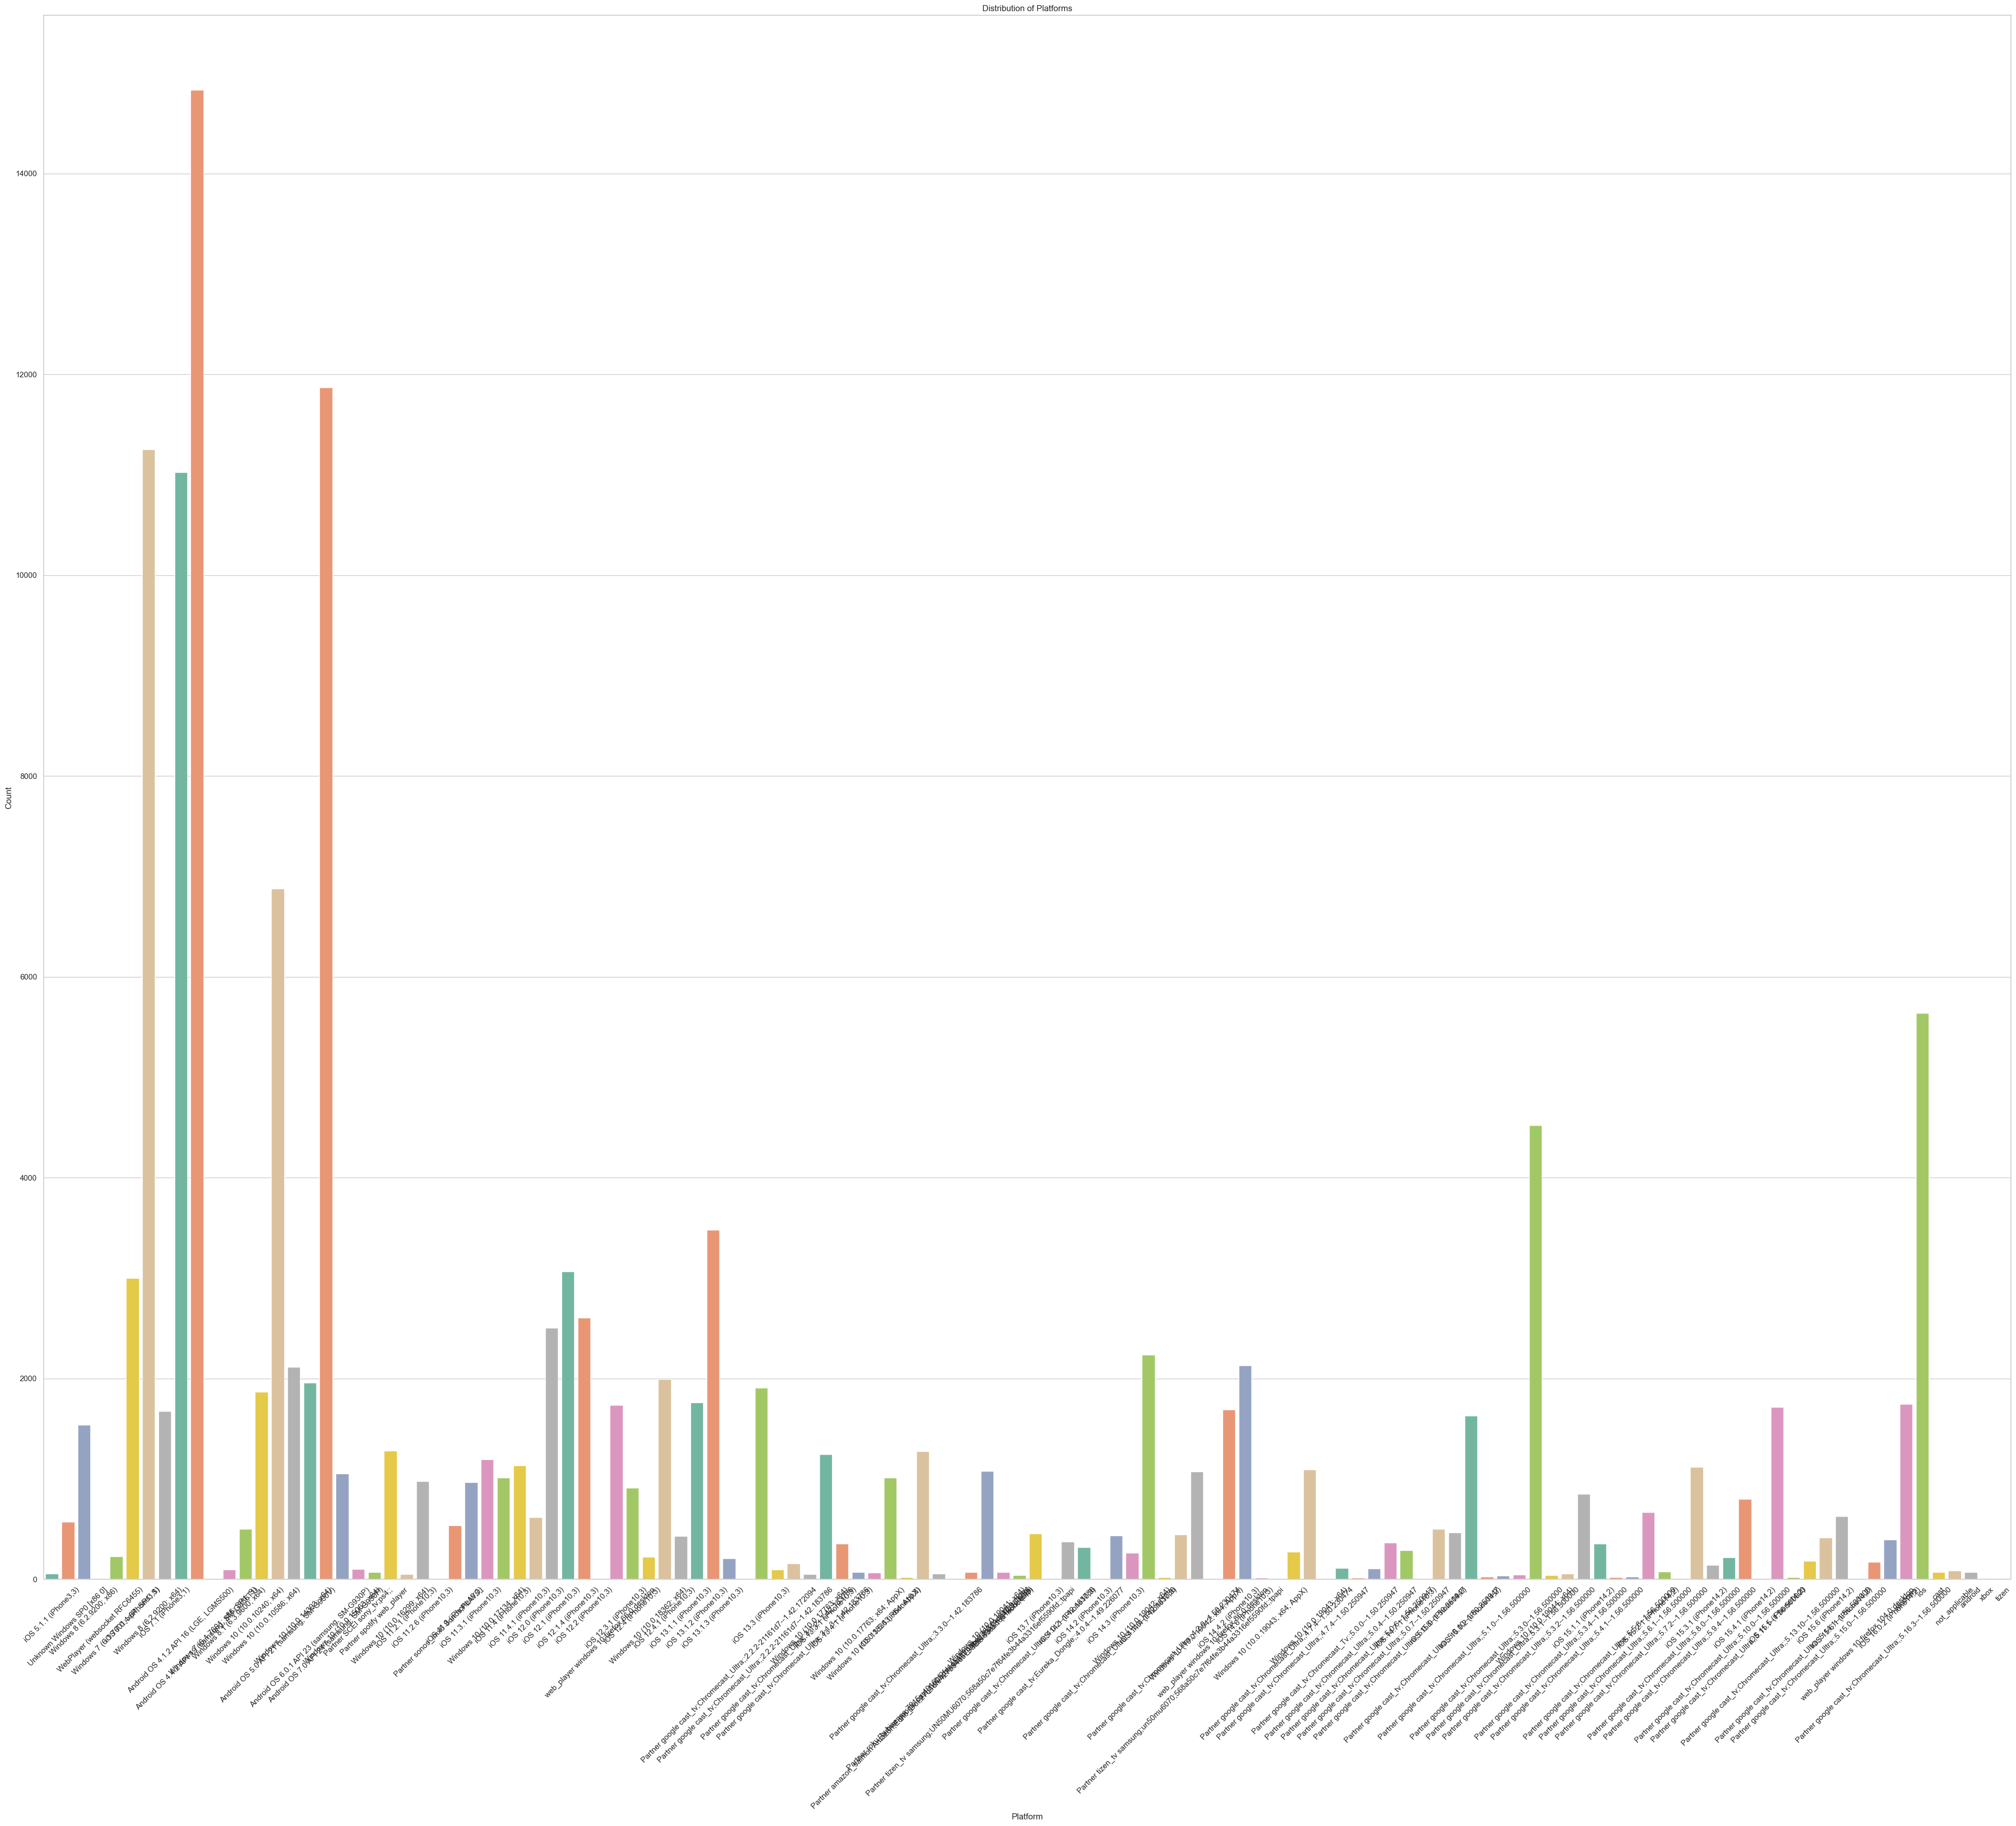

In [17]:
df.describe()

In [18]:
df['seconds_played'] = df['ms_played'] / 1000

In [19]:
df

,ts,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,seconds_played
0,2012-08-31T17:21:11Z,21966,US,unknown,Kill Shit,Krizz Kaliko,Kickin' & Screamin',spotify:track:3eMfBkKz0ZuffMqIVHhNr1,,,False,True,False,21.966
1,2012-08-31T17:30:20Z,454489,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,,trackdone,False,False,False,454.489
2,2012-08-31T17:31:17Z,59112,US,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,False,True,False,59.112
3,2012-08-31T17:35:54Z,261453,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,backbtn,trackdone,False,False,False,261.453
4,2012-08-31T17:36:17Z,22923,US,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,False,True,False,22.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9289,2023-07-31T21:18:24Z,5210,US,unknown,Vampire,Brooklane,Vampire,spotify:track:6ljnm3mEA1vzcRjwydZonk,playbtn,endplay,False,1.0,False,5.210
9290,2023-07-31T21:18:26Z,1540,US,unknown,Catalina Fight Song,Joyce Manor,Never Hungover Again,spotify:track:2TqfK2N1kFoX7OySPCB7pQ,clickrow,endplay,False,1.0,False,1.540
9291,2023-07-31T21:18:27Z,1050,US,unknown,What's Up?,Mom Jeans.,Sweet Tooth,spotify:track:141alNiSd9vG4Lb22BLHWM,clickrow,endplay,False,1.0,False,1.050
9292,2023-07-31T21:18:33Z,6950,US,unknown,"Thinking of You,",Microwave,Split,spotify:track:0wWtrTfTPmdT41WzzvCjhc,clickrow,endplay,False,1.0,False,6.950


In [20]:
df.describe()

,ms_played,seconds_played
count,1.393390e+05,139339.000000
mean,1.385504e+05,138.550416
std,1.007533e+05,100.753319
min,0.000000e+00,0.000000
25%,1.676050e+04,16.760500
50%,1.731030e+05,173.103000
75%,2.136960e+05,213.696000
max,1.432510e+06,1432.510000


In [21]:
df['hours_played'] = df['ms_played'] / (1000*60*60)
total_hours_per_song = pd.DataFrame(df.groupby('master_metadata_track_name')['hours_played'].sum().reset_index())
total_hours_per_artist = pd.DataFrame(df.groupby('master_metadata_album_artist_name')['hours_played'].sum().reset_index())
total_hours_per_song

,master_metadata_track_name,hours_played
0,!,0.011019
1,!!Noble Stabbings!!,0.011171
2,"""Are Or Aren't?"" (Dialogue)",0.034110
3,"""Black!""",0.293376
4,"""Buckwheat""",0.032353
...,...,...
20664,헤픈엔딩 Happen Ending (feat. Joe Won Sun of Rolle...,0.007463
20665,호르몬 전쟁 War of Hormone,5.978363
20666,화창한 봄날에,0.062368
20667,힐끔힐끔 Peep,0.135478


In [22]:
for column in df:
    print(df[column].unique())

['2012-08-31T17:21:11Z' '2012-08-31T17:30:20Z' '2012-08-31T17:31:17Z' ...
 '2023-07-31T21:18:27Z' '2023-07-31T21:18:33Z' '2023-07-31T21:19:07Z']
[ 21966 454489  59112 ... 132337 175829  32790]
['US' 'ZZ' 'GD' 'QA' 'ET' 'CA' 'AU']
['unknown'
 'Mozilla%2f5.0%20(Windows%20NT%206.2%3b%20rv%3a22.0)%20Gecko%2f20100101%20Firefox%2f22.0'
 'Mozilla%2f5.0%20(Windows%20NT%2010.0%3b%20WOW64%3b%20rv%3a49.0)%20Gecko%2f20100101%20Firefox%2f49.0'
 'Mozilla%2F5.0%20(Windows%20NT%2010.0;%20WOW64;%20rv:56.0)%20Gecko%2F20100101%20Firefox%2F56.0'
 'Mozilla%2F5.0%20(Windows%20NT%2010.0;%20WOW64;%20rv:57.0)%20Gecko%2F20100101%20Firefox%2F57.0'
 'Mozilla%2F5.0%20(Windows%20NT%2010.0;%20WOW64;%20rv:66.0)%20Gecko%2F20100101%20Firefox%2F66.0'
 'Mozilla%2F5.0%20(X11;%20Linux%20aarch64)%20AppleWebKit%2F537.36%20(KHTML,%20like%20Gecko)%20Chrome%2F76.0.3809.81%20Safari%2F537.36%20CrKey%2F1.42.172094'
 'Mozilla%2F5.0%20(X11;%20Linux%20aarch64)%20AppleWebKit%2F537.36%20(KHTML,%20like%20Gecko)%20Chrome%2F76.0.3809.81%2

In [23]:
def chunk_data(data, chunk_size):
    for i in range(0, len(data), chunk_size):
        yield data[i:i+chunk_size]

# Define chunk size
chunk_size = 50  # You may adjust this based on the rate limit and your needs

# Create an empty list to store the features
features_list = []

# Chunk the unique track IDs into batches
for chunk in chunk_data(df['spotify_track_uri'].unique(), chunk_size):
    # Get audio features for the current chunk of track IDs
    batch_features = sp.audio_features(chunk)
    # Append the batch features to the features list
    features_list.extend(batch_features)

# Convert the list of features into a DataFrame
features = pd.DataFrame(features_list)

# Now 'features' DataFrame should contain the audio features for all tracks
print(features)

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.722   0.976    1    -3.546     1       0.1770      0.082900   
1             0.827   0.966    1    -2.917     1       0.1510      0.086300   
2             0.676   0.748   10    -5.369     0       0.4880      0.044100   
3             0.671   0.711    2    -7.813     1       0.0478      0.422000   
4             0.563   0.865    5    -5.277     1       0.1600      0.047200   
...             ...     ...  ...       ...   ...          ...           ...   
25717         0.434   0.982    8    -2.551     1       0.0842      0.003430   
25718         0.459   0.932    6    -3.922     1       0.0660      0.000552   
25719         0.422   0.944    8    -5.399     1       0.0818      0.000250   
25720         0.480   0.772    1    -9.951     1       0.1290      0.002520   
25721         0.391   0.706    2    -7.884     1       0.0392      0.023000   

       instrumentalness  liveness  valence    tempo

In [46]:
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.722,0.976,1,-3.546,1,0.1770,0.082900,0.000000,0.3720,0.7570,129.910,audio_features,3eMfBkKz0ZuffMqIVHhNr1,spotify:track:3eMfBkKz0ZuffMqIVHhNr1,https://api.spotify.com/v1/tracks/3eMfBkKz0Zuf...,https://api.spotify.com/v1/audio-analysis/3eMf...,240107,4
1,0.827,0.966,1,-2.917,1,0.1510,0.086300,0.000000,0.7990,0.7200,144.078,audio_features,44eZ0RG3gWBfiD5o9pvIV9,spotify:track:44eZ0RG3gWBfiD5o9pvIV9,https://api.spotify.com/v1/tracks/44eZ0RG3gWBf...,https://api.spotify.com/v1/audio-analysis/44eZ...,261453,4
2,0.676,0.748,10,-5.369,0,0.4880,0.044100,0.000000,0.8970,0.5290,140.045,audio_features,0uQWGMWQAtpISoXTEi5as6,spotify:track:0uQWGMWQAtpISoXTEi5as6,https://api.spotify.com/v1/tracks/0uQWGMWQAtpI...,https://api.spotify.com/v1/audio-analysis/0uQW...,150693,4
3,0.671,0.711,2,-7.813,1,0.0478,0.422000,0.000000,0.1040,0.4660,113.809,audio_features,45Zo6ftGzq6wRckCUrMoBJ,spotify:track:45Zo6ftGzq6wRckCUrMoBJ,https://api.spotify.com/v1/tracks/45Zo6ftGzq6w...,https://api.spotify.com/v1/audio-analysis/45Zo...,248440,4
4,0.563,0.865,5,-5.277,1,0.1600,0.047200,0.000191,0.7700,0.6010,156.271,audio_features,6b7TVeW6F7YLK1ZHDb2VA1,spotify:track:6b7TVeW6F7YLK1ZHDb2VA1,https://api.spotify.com/v1/tracks/6b7TVeW6F7YL...,https://api.spotify.com/v1/audio-analysis/6b7T...,209413,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,0.434,0.982,8,-2.551,1,0.0842,0.003430,0.000000,0.1210,0.6040,180.032,audio_features,1LX0mHhWjzv03627Qi80Qd,spotify:track:1LX0mHhWjzv03627Qi80Qd,https://api.spotify.com/v1/tracks/1LX0mHhWjzv0...,https://api.spotify.com/v1/audio-analysis/1LX0...,152360,4
25718,0.459,0.932,6,-3.922,1,0.0660,0.000552,0.000000,0.2070,0.7080,102.554,audio_features,3Db6ZwEQrLCc6phB61zJHq,spotify:track:3Db6ZwEQrLCc6phB61zJHq,https://api.spotify.com/v1/tracks/3Db6ZwEQrLCc...,https://api.spotify.com/v1/audio-analysis/3Db6...,175829,4
25719,0.422,0.944,8,-5.399,1,0.0818,0.000250,0.000301,0.0846,0.5680,139.959,audio_features,3ub5KhKyPgGROItcZgQf1o,spotify:track:3ub5KhKyPgGROItcZgQf1o,https://api.spotify.com/v1/tracks/3ub5KhKyPgGR...,https://api.spotify.com/v1/audio-analysis/3ub5...,237186,4
25720,0.480,0.772,1,-9.951,1,0.1290,0.002520,0.001380,0.5450,0.2690,145.053,audio_features,6ljnm3mEA1vzcRjwydZonk,spotify:track:6ljnm3mEA1vzcRjwydZonk,https://api.spotify.com/v1/tracks/6ljnm3mEA1vz...,https://api.spotify.com/v1/audio-analysis/6ljn...,205405,4


In [43]:
df = df.merge(features, how='left', left_on='spotify_track_uri', right_on='uri')

# Group by the distinct entries and sum up the duration values
result = df.groupby('spotify_track_uri')['duration_ms'].sum().reset_index()

# Print the result
result

C:\Users\maxma\AppData\Local\Temp\ipykernel_51044\3317069338.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'uri_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(features, how='left', left_on='spotify_track_uri', right_on='uri')


,spotify_track_uri,duration_ms
0,spotify:track:002AzLaJtX4Tyi7Yv0J49w,420758
1,spotify:track:003FTlCpBTM4eSqYSWPv4H,4665340
2,spotify:track:003vvx7Niy0yvhvHt4a68B,222973
3,spotify:track:004VU4cWTkRqVMrlv8KW3D,1145600
4,spotify:track:0054onP0Kw05Ws8rrhkIlx,1754230
...,...,...
25717,spotify:track:7zu033uK8PfJ0lqOIKHhzL,2002290
25718,spotify:track:7zulua0I1rbhbStBxJFuno,510456
25719,spotify:track:7zweZVDWIMvQIC6bDsEtcL,1325718
25720,spotify:track:7zx0r1pcEiX92UwJ3MuNbV,444028


In [44]:
df.sort_values(by=['seconds_played'])

,ts,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,...,liveness,valence,tempo,type,id,uri_y,track_href,analysis_url,duration_ms,time_signature
55385,2017-02-09 02:35:05+00:00,0,US,unknown,Back To Back,Drake,Back To Back,spotify:track:5lFDtgWsjRJu8fPOAyJIAK,fwdbtn,fwdbtn,...,0.116,0.382,86.976,audio_features,5lFDtgWsjRJu8fPOAyJIAK,spotify:track:5lFDtgWsjRJu8fPOAyJIAK,https://api.spotify.com/v1/tracks/5lFDtgWsjRJu...,https://api.spotify.com/v1/audio-analysis/5lFD...,170638,4
8946,2014-04-29 19:40:41+00:00,0,US,unknown,House of Gold,Twenty One Pilots,Vessel,spotify:track:36tghkPg1AO4HsAzo6YpPp,appload,appload,...,0.208,0.851,114.948,audio_features,36tghkPg1AO4HsAzo6YpPp,spotify:track:36tghkPg1AO4HsAzo6YpPp,https://api.spotify.com/v1/tracks/36tghkPg1AO4...,https://api.spotify.com/v1/audio-analysis/36tg...,163880,4
29632,2015-03-25 12:42:42+00:00,0,US,unknown,Truffle Butter,Nicki Minaj,Truffle Butter,spotify:track:3keUgTGEoZJt0QkzTB6kHg,fwdbtn,fwdbtn,...,0.124,0.491,105.113,audio_features,3keUgTGEoZJt0QkzTB6kHg,spotify:track:3keUgTGEoZJt0QkzTB6kHg,https://api.spotify.com/v1/tracks/3keUgTGEoZJt...,https://api.spotify.com/v1/audio-analysis/3keU...,219227,4
16661,2014-09-30 14:54:32+00:00,0,US,unknown,Girl All the Bad Guys Want,Bowling For Soup,Girls Gone Wild Music: Volume 1,spotify:track:0l81LQsw3UjSZ7dc5Qspfw,fwdbtn,fwdbtn,...,0.162,0.856,130.976,audio_features,0l81LQsw3UjSZ7dc5Qspfw,spotify:track:0l81LQsw3UjSZ7dc5Qspfw,https://api.spotify.com/v1/tracks/0l81LQsw3UjS...,https://api.spotify.com/v1/audio-analysis/0l81...,197373,4
102865,2020-09-14 12:51:52+00:00,0,US,unknown,君はヒーローになれる,Yuki Hayashi,TVアニメ『僕のヒーローアカデミア』オリジナル・サウンドトラック,spotify:track:1Cdz1ehTv3zCKqmGbPI2Vo,trackdone,endplay,...,0.096,0.169,91.969,audio_features,1Cdz1ehTv3zCKqmGbPI2Vo,spotify:track:1Cdz1ehTv3zCKqmGbPI2Vo,https://api.spotify.com/v1/tracks/1Cdz1ehTv3zC...,https://api.spotify.com/v1/audio-analysis/1Cdz...,176053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24921,2015-01-14 03:46:17+00:00,937872,US,unknown,Order of the Court,Matt Braunger,Don't Tell My Mother!,spotify:track:4AVqcdwaFwF3z2jgdXHm0l,appload,trackdone,...,0.846,0.517,63.926,audio_features,4AVqcdwaFwF3z2jgdXHm0l,spotify:track:4AVqcdwaFwF3z2jgdXHm0l,https://api.spotify.com/v1/tracks/4AVqcdwaFwF3...,https://api.spotify.com/v1/audio-analysis/4AVq...,937872,3
5353,2014-03-07 04:09:23+00:00,1119653,US,unknown,Sober Vegan Party Time,Jamie Kilstein,What Alive People Do,spotify:track:5J2tbBcaunqxKR13g9jsaL,trackdone,trackdone,...,0.881,0.531,72.861,audio_features,5J2tbBcaunqxKR13g9jsaL,spotify:track:5J2tbBcaunqxKR13g9jsaL,https://api.spotify.com/v1/tracks/5J2tbBcaunqx...,https://api.spotify.com/v1/audio-analysis/5J2t...,1119653,3
5359,2014-03-07 04:53:04+00:00,1287053,US,unknown,Two Sad Stories,Jamie Kilstein,What Alive People Do,spotify:track:5PI1hgonu5ypz1DfqSafgC,trackdone,trackdone,...,0.955,0.540,98.526,audio_features,5PI1hgonu5ypz1DfqSafgC,spotify:track:5PI1hgonu5ypz1DfqSafgC,https://api.spotify.com/v1/tracks/5PI1hgonu5yp...,https://api.spotify.com/v1/audio-analysis/5PI1...,1287053,4
114455,2021-09-09 18:24:16+00:00,1335094,US,unknown,I Just Want To Sell Out My Funeral,The Wonder Years,The Greatest Generation,spotify:track:332ir2EcItlNDEju0vj61P,clickrow,trackdone,...,0.374,0.307,114.897,audio_features,332ir2EcItlNDEju0vj61P,spotify:track:332ir2EcItlNDEju0vj61P,https://api.spotify.com/v1/tracks/332ir2EcItlN...,https://api.spotify.com/v1/audio-analysis/332i...,454817,4


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139339 entries, 0 to 139338
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   ts                                 139339 non-null  datetime64[ns, UTC]
 1   ms_played                          139339 non-null  int64              
 2   conn_country                       139339 non-null  object             
 3   user_agent_decrypted               138032 non-null  object             
 4   master_metadata_track_name         139339 non-null  object             
 5   master_metadata_album_artist_name  139339 non-null  object             
 6   master_metadata_album_album_name   139339 non-null  object             
 7   spotify_track_uri                  139339 non-null  object             
 8   reason_start                       139339 non-null  object             
 9   reason_end                         13

In [50]:
df.drop('uri_x', axis=1, inplace=True)
df.drop('uri_y', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139339 entries, 0 to 139338
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   ts                                 139339 non-null  datetime64[ns, UTC]
 1   ms_played                          139339 non-null  int64              
 2   conn_country                       139339 non-null  object             
 3   user_agent_decrypted               138032 non-null  object             
 4   master_metadata_track_name         139339 non-null  object             
 5   master_metadata_album_artist_name  139339 non-null  object             
 6   master_metadata_album_album_name   139339 non-null  object             
 7   spotify_track_uri                  139339 non-null  object             
 8   reason_start                       139339 non-null  object             
 9   reason_end                         13

In [57]:
df

,ts,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,2012-08-31 17:21:11+00:00,21966,US,unknown,Kill Shit,Krizz Kaliko,Kickin' & Screamin',spotify:track:3eMfBkKz0ZuffMqIVHhNr1,,,...,0.000000,0.372,0.7570,129.910,audio_features,3eMfBkKz0ZuffMqIVHhNr1,https://api.spotify.com/v1/tracks/3eMfBkKz0Zuf...,https://api.spotify.com/v1/audio-analysis/3eMf...,240107,4
1,2012-08-31 17:30:20+00:00,454489,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,,trackdone,...,0.000000,0.799,0.7200,144.078,audio_features,44eZ0RG3gWBfiD5o9pvIV9,https://api.spotify.com/v1/tracks/44eZ0RG3gWBf...,https://api.spotify.com/v1/audio-analysis/44eZ...,261453,4
2,2012-08-31 17:31:17+00:00,59112,US,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,...,0.000000,0.897,0.5290,140.045,audio_features,0uQWGMWQAtpISoXTEi5as6,https://api.spotify.com/v1/tracks/0uQWGMWQAtpI...,https://api.spotify.com/v1/audio-analysis/0uQW...,150693,4
3,2012-08-31 17:35:54+00:00,261453,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,backbtn,trackdone,...,0.000000,0.799,0.7200,144.078,audio_features,44eZ0RG3gWBfiD5o9pvIV9,https://api.spotify.com/v1/tracks/44eZ0RG3gWBf...,https://api.spotify.com/v1/audio-analysis/44eZ...,261453,4
4,2012-08-31 17:36:17+00:00,22923,US,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,...,0.000000,0.897,0.5290,140.045,audio_features,0uQWGMWQAtpISoXTEi5as6,https://api.spotify.com/v1/tracks/0uQWGMWQAtpI...,https://api.spotify.com/v1/audio-analysis/0uQW...,150693,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139334,2023-07-31 21:18:24+00:00,5210,US,unknown,Vampire,Brooklane,Vampire,spotify:track:6ljnm3mEA1vzcRjwydZonk,playbtn,endplay,...,0.001380,0.545,0.2690,145.053,audio_features,6ljnm3mEA1vzcRjwydZonk,https://api.spotify.com/v1/tracks/6ljnm3mEA1vz...,https://api.spotify.com/v1/audio-analysis/6ljn...,205405,4
139335,2023-07-31 21:18:26+00:00,1540,US,unknown,Catalina Fight Song,Joyce Manor,Never Hungover Again,spotify:track:2TqfK2N1kFoX7OySPCB7pQ,clickrow,endplay,...,0.000000,0.103,0.3490,107.655,audio_features,2TqfK2N1kFoX7OySPCB7pQ,https://api.spotify.com/v1/tracks/2TqfK2N1kFoX...,https://api.spotify.com/v1/audio-analysis/2Tqf...,65000,4
139336,2023-07-31 21:18:27+00:00,1050,US,unknown,What's Up?,Mom Jeans.,Sweet Tooth,spotify:track:141alNiSd9vG4Lb22BLHWM,clickrow,endplay,...,0.000199,0.274,0.8280,84.488,audio_features,141alNiSd9vG4Lb22BLHWM,https://api.spotify.com/v1/tracks/141alNiSd9vG...,https://api.spotify.com/v1/audio-analysis/141a...,141909,4
139337,2023-07-31 21:18:33+00:00,6950,US,unknown,"Thinking of You,",Microwave,Split,spotify:track:0wWtrTfTPmdT41WzzvCjhc,clickrow,endplay,...,0.026600,0.145,0.0684,75.018,audio_features,0wWtrTfTPmdT41WzzvCjhc,https://api.spotify.com/v1/tracks/0wWtrTfTPmdT...,https://api.spotify.com/v1/audio-analysis/0wWt...,278065,4


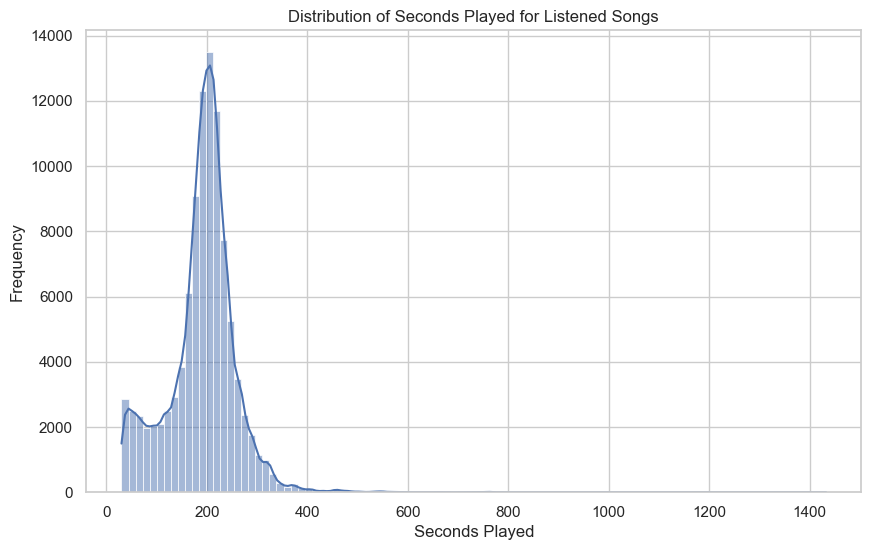

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
listen_threshold = 30
df['listen_status'] = df['seconds_played'] >= listen_threshold
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['listen_status']], x='seconds_played', bins=100, kde=True)
plt.title('Distribution of Seconds Played for Listened Songs')
plt.xlabel('Seconds Played')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

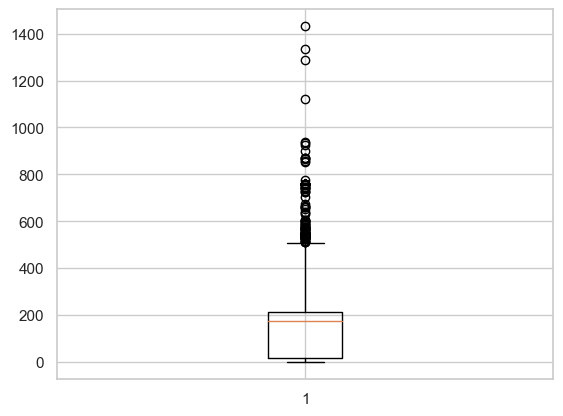

In [28]:
plt.boxplot(df['seconds_played'])
plt.show

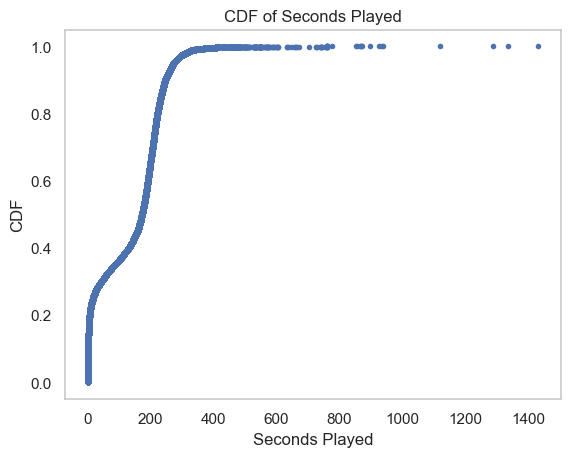

In [31]:
sorted_data = np.sort(df['seconds_played'])
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
cdf_df = pd.DataFrame({'Seconds Played': sorted_data, 'CDF': cdf})
plt.plot(cdf_df['Seconds Played'], cdf_df['CDF'], marker='.', linestyle='none')
plt.xlabel('Seconds Played')
plt.ylabel('CDF')
plt.title('CDF of Seconds Played')
plt.grid()
plt.show()

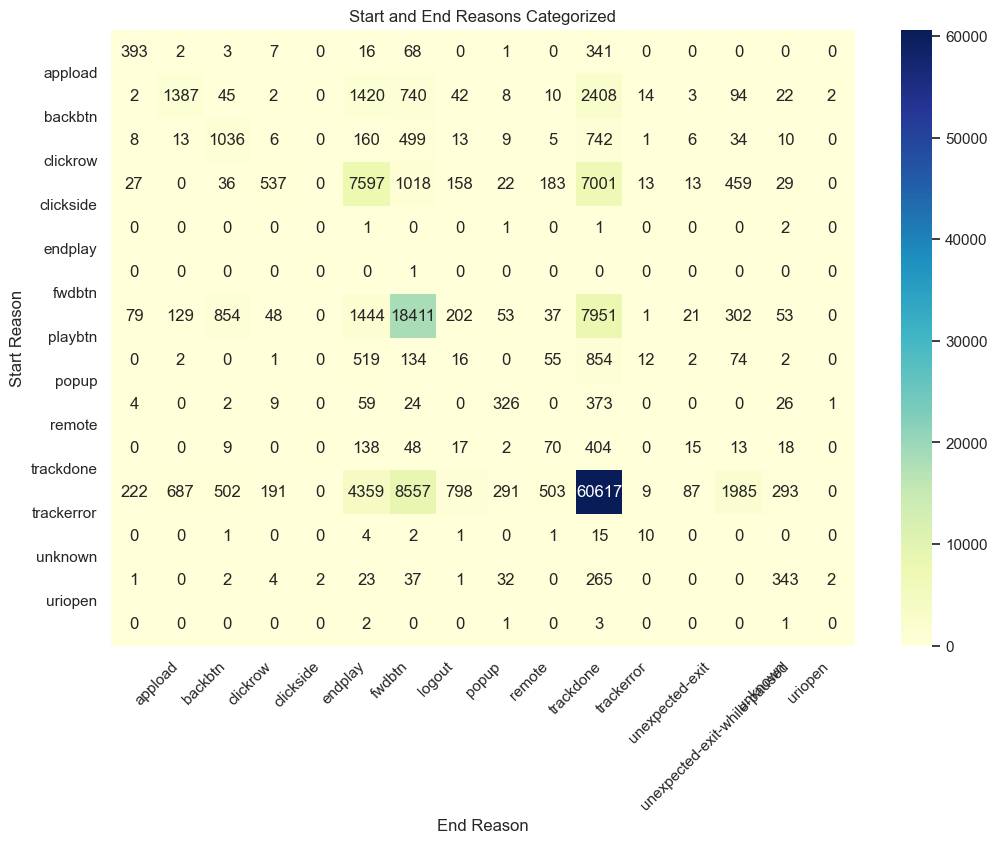

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count unique combinations of start and end reasons
pivot_df = df.pivot_table(index='reason_start', columns='reason_end', aggfunc='size', fill_value=0)

# Create the heatmap with custom scaling and tick labels
plt.figure(figsize=(12,8))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu', vmin=0, vmax=pivot_df.values.max())

# Set custom tick labels
plt.title('Start and End Reasons Categorized')
plt.xlabel('End Reason')
plt.ylabel('Start Reason')
plt.xticks(ticks=np.arange(len(pivot_df.columns)), labels=pivot_df.columns, rotation=45)
plt.yticks(ticks=np.arange(len(pivot_df.index)), labels=pivot_df.index)

plt.show()


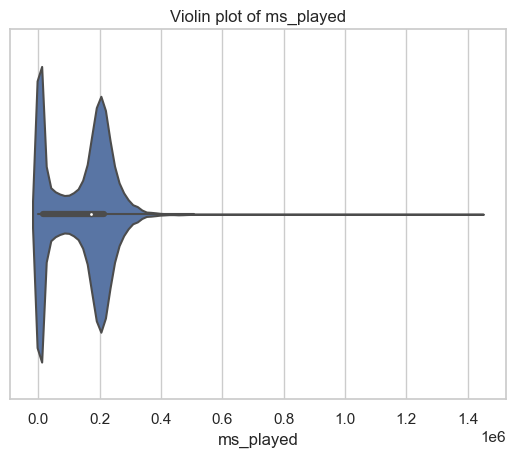

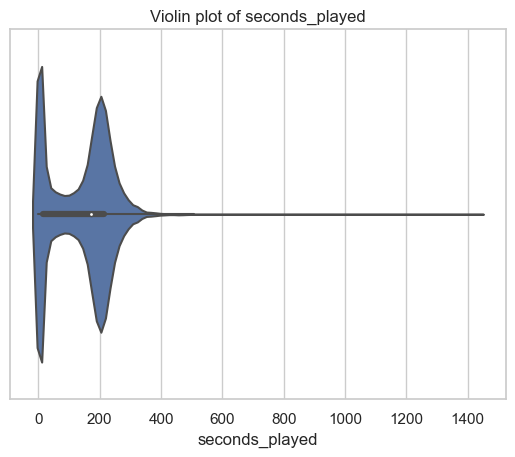

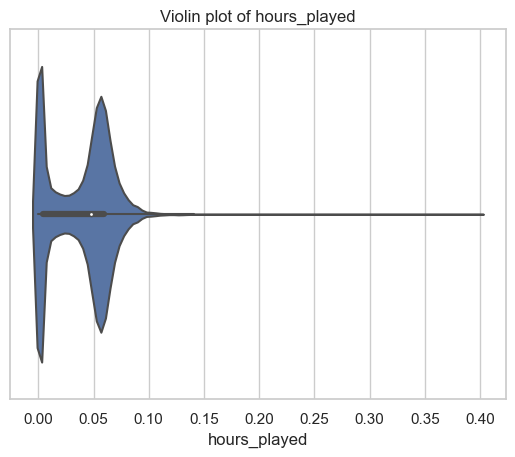

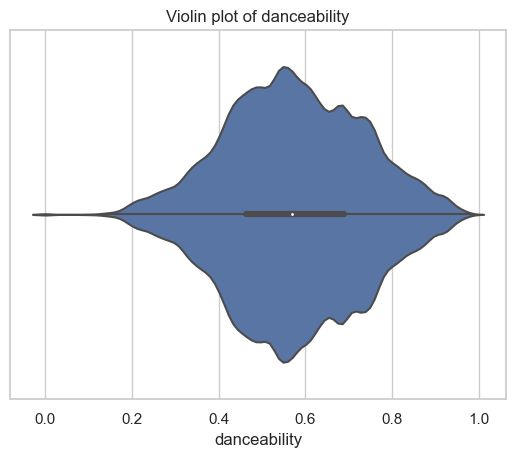

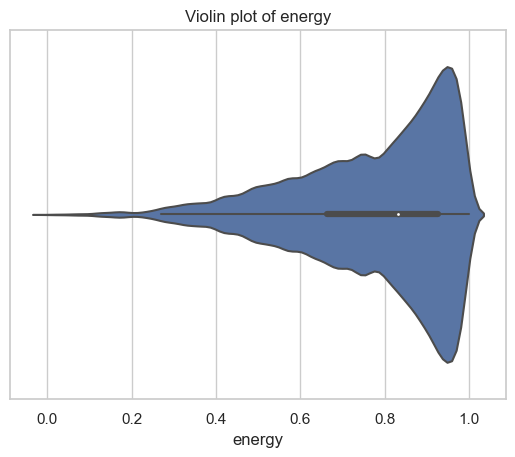

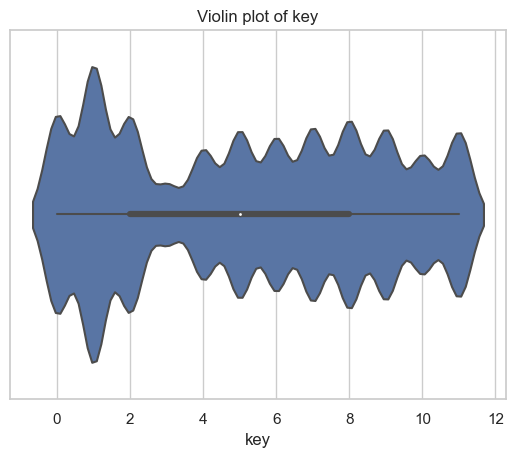

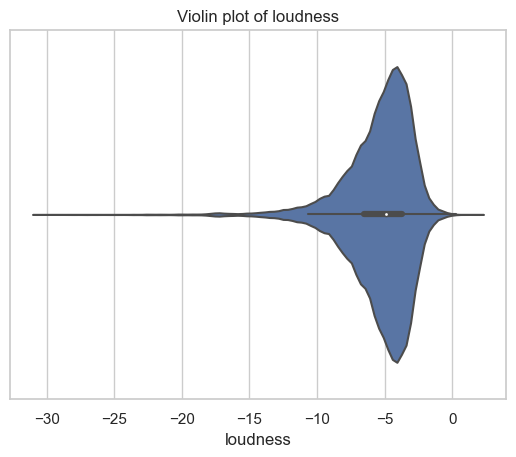

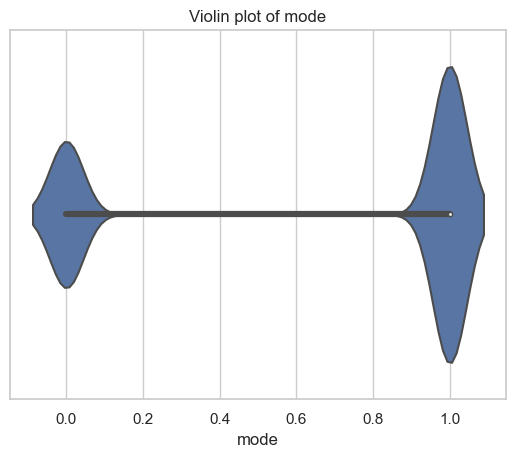

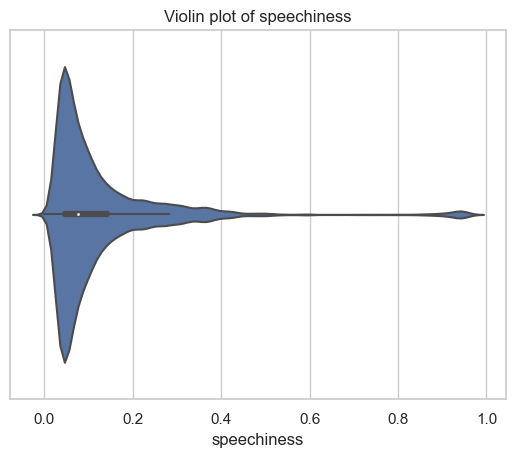

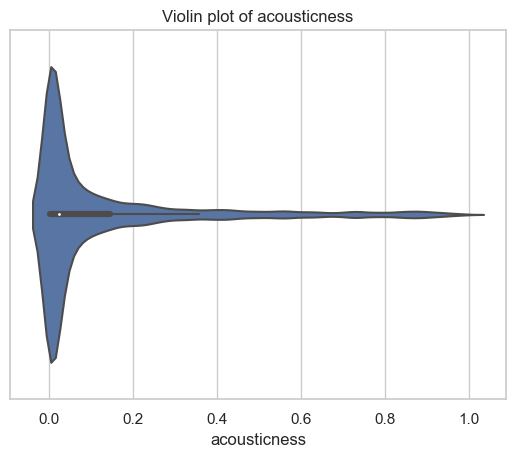

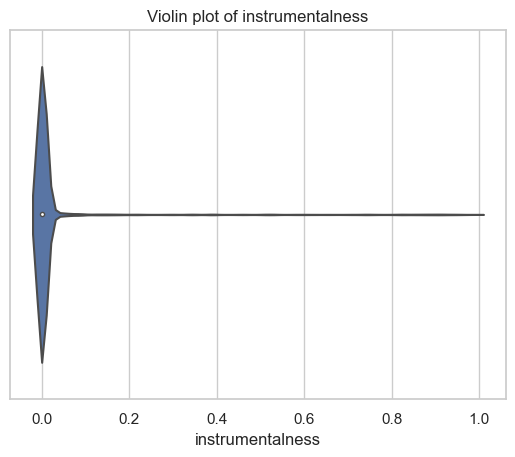

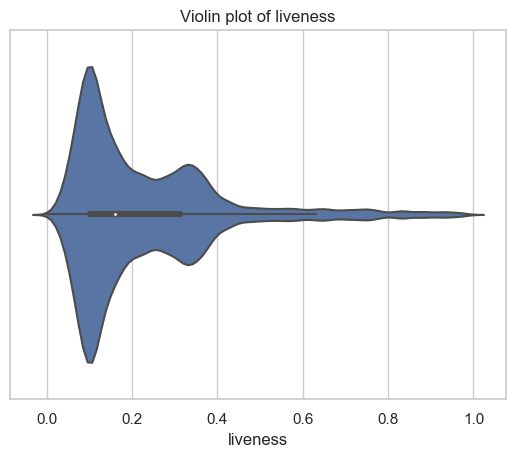

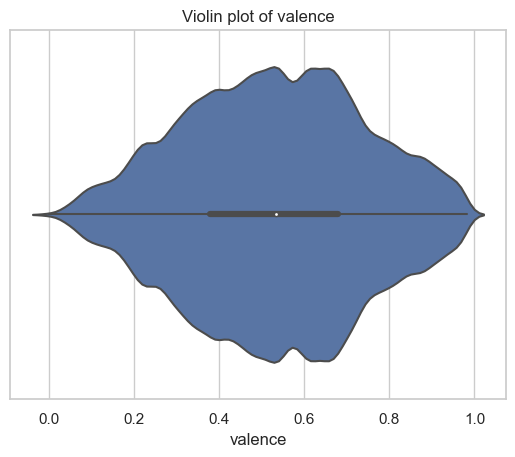

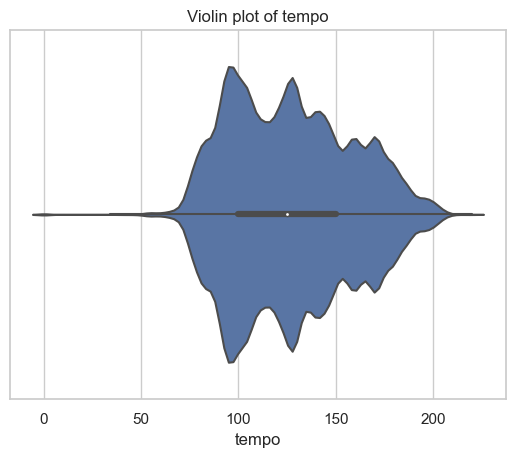

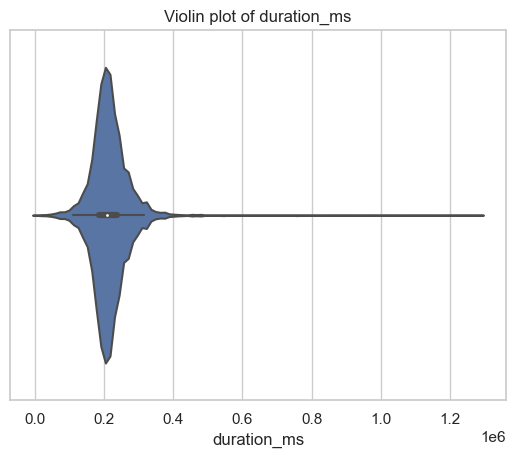

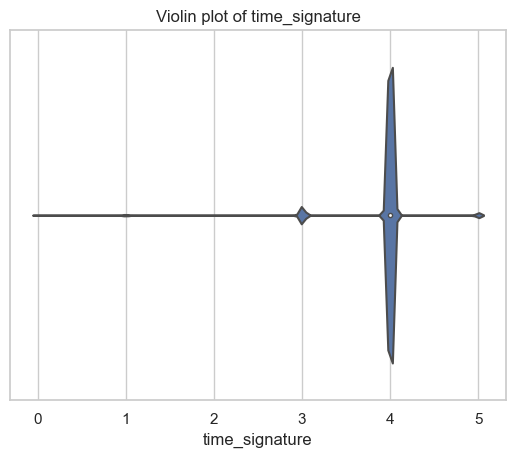

In [54]:
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting
sns.set(style="whitegrid")
for var in continuous_vars:
    sns.violinplot(x=df[var])
    plt.title(f'Violin plot of {var}')
    plt.show()

In [55]:
top25 = df[df['seconds_played'] > df['seconds_played'].quantile(.75)]
top25

,ts,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
1,2012-08-31 17:30:20+00:00,454489,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,,trackdone,...,0.000000,0.799,0.720,144.078,audio_features,44eZ0RG3gWBfiD5o9pvIV9,https://api.spotify.com/v1/tracks/44eZ0RG3gWBf...,https://api.spotify.com/v1/audio-analysis/44eZ...,261453,4
3,2012-08-31 17:35:54+00:00,261453,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,backbtn,trackdone,...,0.000000,0.799,0.720,144.078,audio_features,44eZ0RG3gWBfiD5o9pvIV9,https://api.spotify.com/v1/tracks/44eZ0RG3gWBf...,https://api.spotify.com/v1/audio-analysis/44eZ...,261453,4
40,2012-09-01 18:44:02+00:00,261453,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,,trackdone,...,0.000000,0.799,0.720,144.078,audio_features,44eZ0RG3gWBfiD5o9pvIV9,https://api.spotify.com/v1/tracks/44eZ0RG3gWBf...,https://api.spotify.com/v1/audio-analysis/44eZ...,261453,4
42,2012-09-01 18:51:12+00:00,248440,US,unknown,Under Pressure - Remastered 2011,Queen,Queen 40 Limited Edition Collector's Box Set V...,spotify:track:45Zo6ftGzq6wRckCUrMoBJ,trackdone,trackdone,...,0.000000,0.104,0.466,113.809,audio_features,45Zo6ftGzq6wRckCUrMoBJ,https://api.spotify.com/v1/tracks/45Zo6ftGzq6w...,https://api.spotify.com/v1/audio-analysis/45Zo...,248440,4
47,2012-09-01 22:38:07+00:00,776899,US,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,fwdbtn,endplay,...,0.000000,0.799,0.720,144.078,audio_features,44eZ0RG3gWBfiD5o9pvIV9,https://api.spotify.com/v1/tracks/44eZ0RG3gWBf...,https://api.spotify.com/v1/audio-analysis/44eZ...,261453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139297,2023-07-30 02:29:48+00:00,214857,US,unknown,Lucy,Cleveland Avenue,Lucy,spotify:track:1LgGsJB2CnM9FwNejrtvLr,clickrow,trackdone,...,0.000116,0.275,0.373,105.030,audio_features,1LgGsJB2CnM9FwNejrtvLr,https://api.spotify.com/v1/tracks/1LgGsJB2CnM9...,https://api.spotify.com/v1/audio-analysis/1LgG...,214857,4
139305,2023-07-31 14:10:56+00:00,240560,US,unknown,Where Have You Been?,Reel Big Fish,Cheer Up!,spotify:track:2gU62OjtnFS3M2XVNEYC2Y,clickrow,trackdone,...,0.000002,0.108,0.376,196.685,audio_features,2gU62OjtnFS3M2XVNEYC2Y,https://api.spotify.com/v1/tracks/2gU62OjtnFS3...,https://api.spotify.com/v1/audio-analysis/2gU6...,240560,4
139309,2023-07-31 14:27:33+00:00,227800,US,unknown,Straight North,Koyo,Straight North,spotify:track:0WD8ywsPXohkwI5Zcuf46j,backbtn,trackdone,...,0.000010,0.359,0.251,163.946,audio_features,0WD8ywsPXohkwI5Zcuf46j,https://api.spotify.com/v1/tracks/0WD8ywsPXohk...,https://api.spotify.com/v1/audio-analysis/0WD8...,227800,4
139313,2023-07-31 14:40:06+00:00,231022,US,unknown,Ignore Check Engine Lights,Icarus The Owl,Icarus the Owl,spotify:track:0prkIL2IFTklq57p8wLrZG,trackdone,trackdone,...,0.000000,0.038,0.498,108.005,audio_features,0prkIL2IFTklq57p8wLrZG,https://api.spotify.com/v1/tracks/0prkIL2IFTkl...,https://api.spotify.com/v1/audio-analysis/0prk...,231022,3


In [56]:
top25.describe()

,ms_played,seconds_played,hours_played,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3.481200e+04,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,3.481200e+04,34812.000000
mean,2.526944e+05,252.694391,0.070193,0.569146,0.771737,5.170516,-5.367314,0.651471,0.129502,0.124138,0.017583,0.228567,0.503085,124.857155,2.533231e+05,3.949357
std,4.668338e+04,46.683380,0.012968,0.154783,0.177935,3.653360,2.284391,0.476511,0.149763,0.208038,0.096591,0.184218,0.207684,29.540079,4.787946e+04,0.321034
min,2.137060e+05,213.706000,0.059363,0.124000,0.013300,0.000000,-25.194000,0.000000,0.022700,0.000001,0.000000,0.019400,0.033800,39.931000,1.110610e+05,1.000000
25%,2.246060e+05,224.606000,0.062391,0.463000,0.662000,1.000000,-6.520000,0.000000,0.045800,0.002577,0.000000,0.103000,0.350000,99.986000,2.248000e+05,4.000000
50%,2.393200e+05,239.320000,0.066478,0.562000,0.825000,5.000000,-4.964000,1.000000,0.078000,0.024900,0.000000,0.160000,0.491000,124.945000,2.400170e+05,4.000000
75%,2.660055e+05,266.005500,0.073890,0.680000,0.918000,8.000000,-3.803000,1.000000,0.149000,0.138000,0.000032,0.313000,0.652000,144.968000,2.675510e+05,4.000000
max,1.432510e+06,1432.510000,0.397919,0.979000,0.997000,11.000000,1.023000,1.000000,0.965000,0.987000,0.966000,0.983000,0.981000,220.099000,1.287053e+06,5.000000


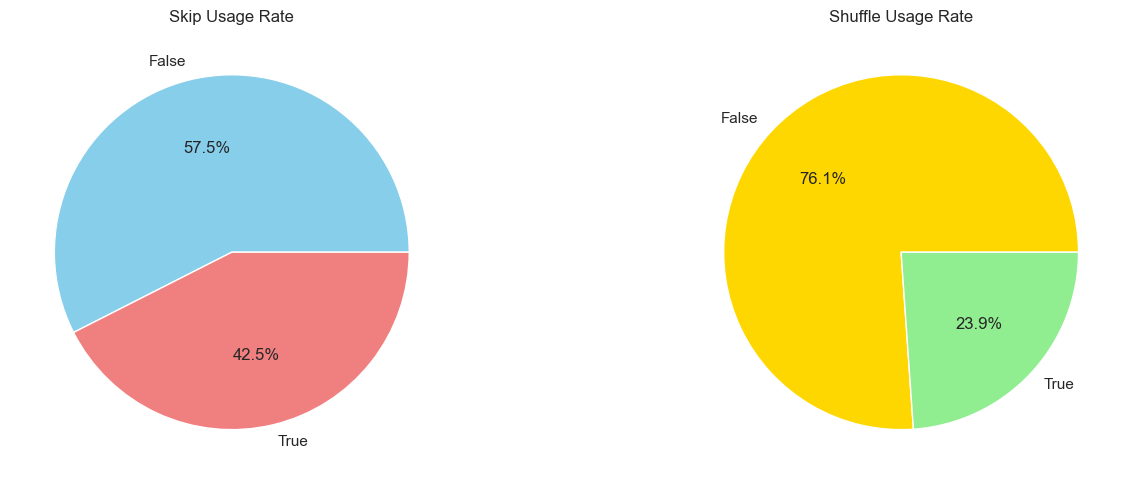

In [33]:
# Calculate usage rates
skip_rate = df['skipped'].value_counts(normalize=True) * 100
shuffle_rate = df['shuffle'].value_counts(normalize=True) * 100

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].pie(skip_rate, labels=skip_rate.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[0].set_title('Skip Usage Rate')
axes[1].pie(shuffle_rate, labels=shuffle_rate.index, autopct='%1.1f%%', colors=['gold', 'lightgreen'])
axes[1].set_title('Shuffle Usage Rate')
plt.tight_layout()
plt.show()


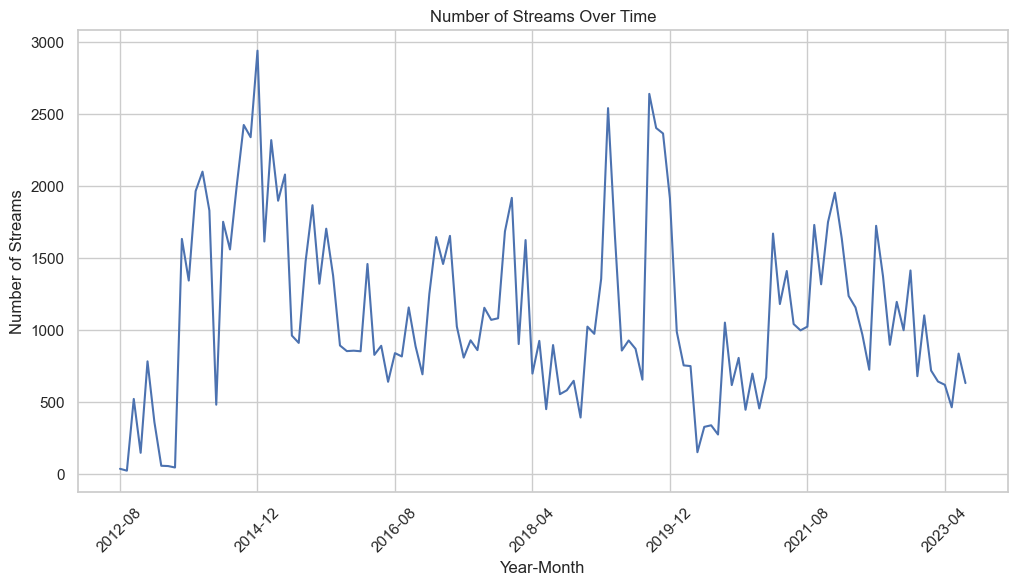

In [34]:
# Convert 'ts' to datetime, ensuring timezone is retained
df['ts'] = pd.to_datetime(df['ts'])

# Group data by year-month directly without converting to Periods
# This method retains timezone information
df['year_month'] = df['ts'].dt.strftime('%Y-%m')
stream_count_by_month = df.groupby('year_month').size()

# Create a line plot
plt.figure(figsize=(12, 6))
stream_count_by_month.plot(kind='line')
plt.title('Number of Streams Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Streams')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


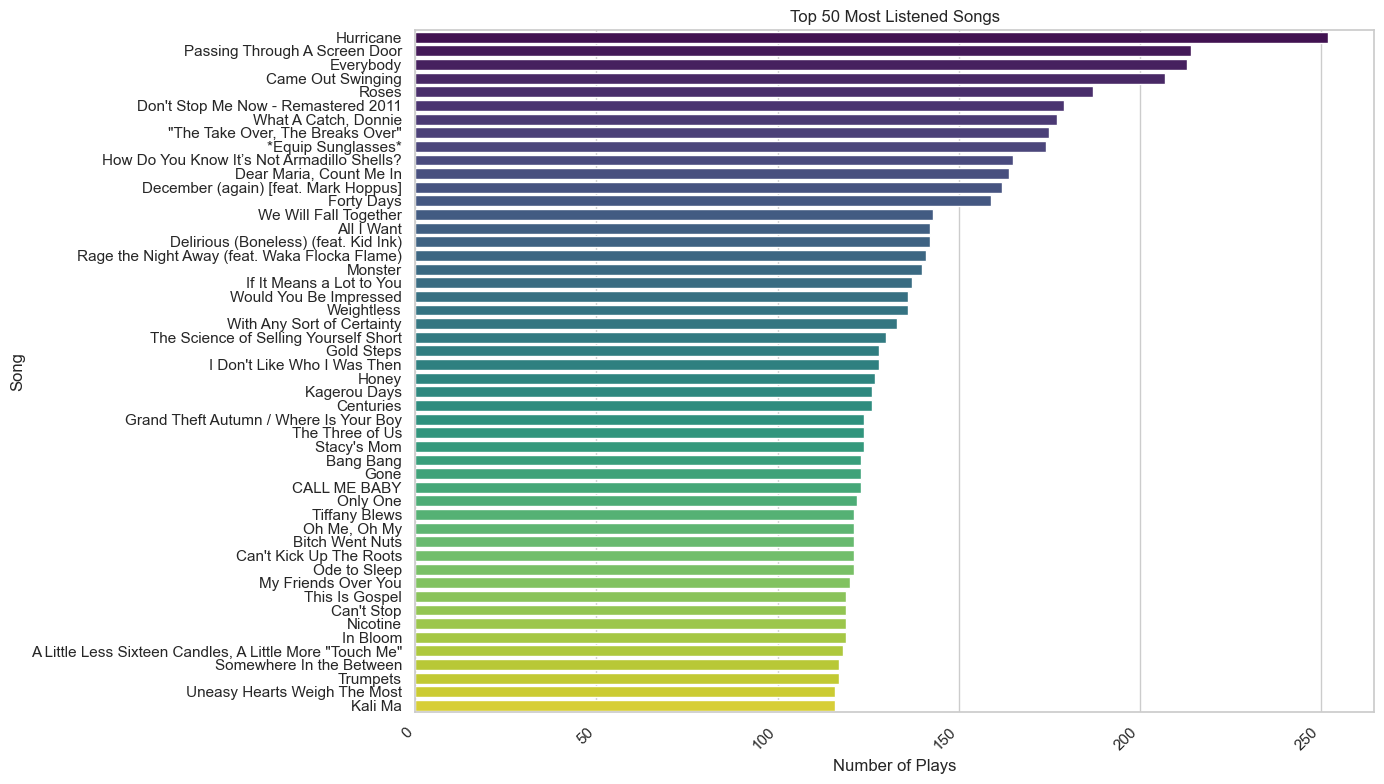

In [35]:
# Get the top 50 most listened songs
top_songs = df['master_metadata_track_name'].value_counts().head(50)

# Create a bar plot for top songs
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.barplot(x=top_songs.values, y=top_songs.index, palette='viridis')

# Add title and labels
plt.title('Top 50 Most Listened Songs')
plt.xlabel('Number of Plays')
plt.ylabel('Song')

# Rotate song labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


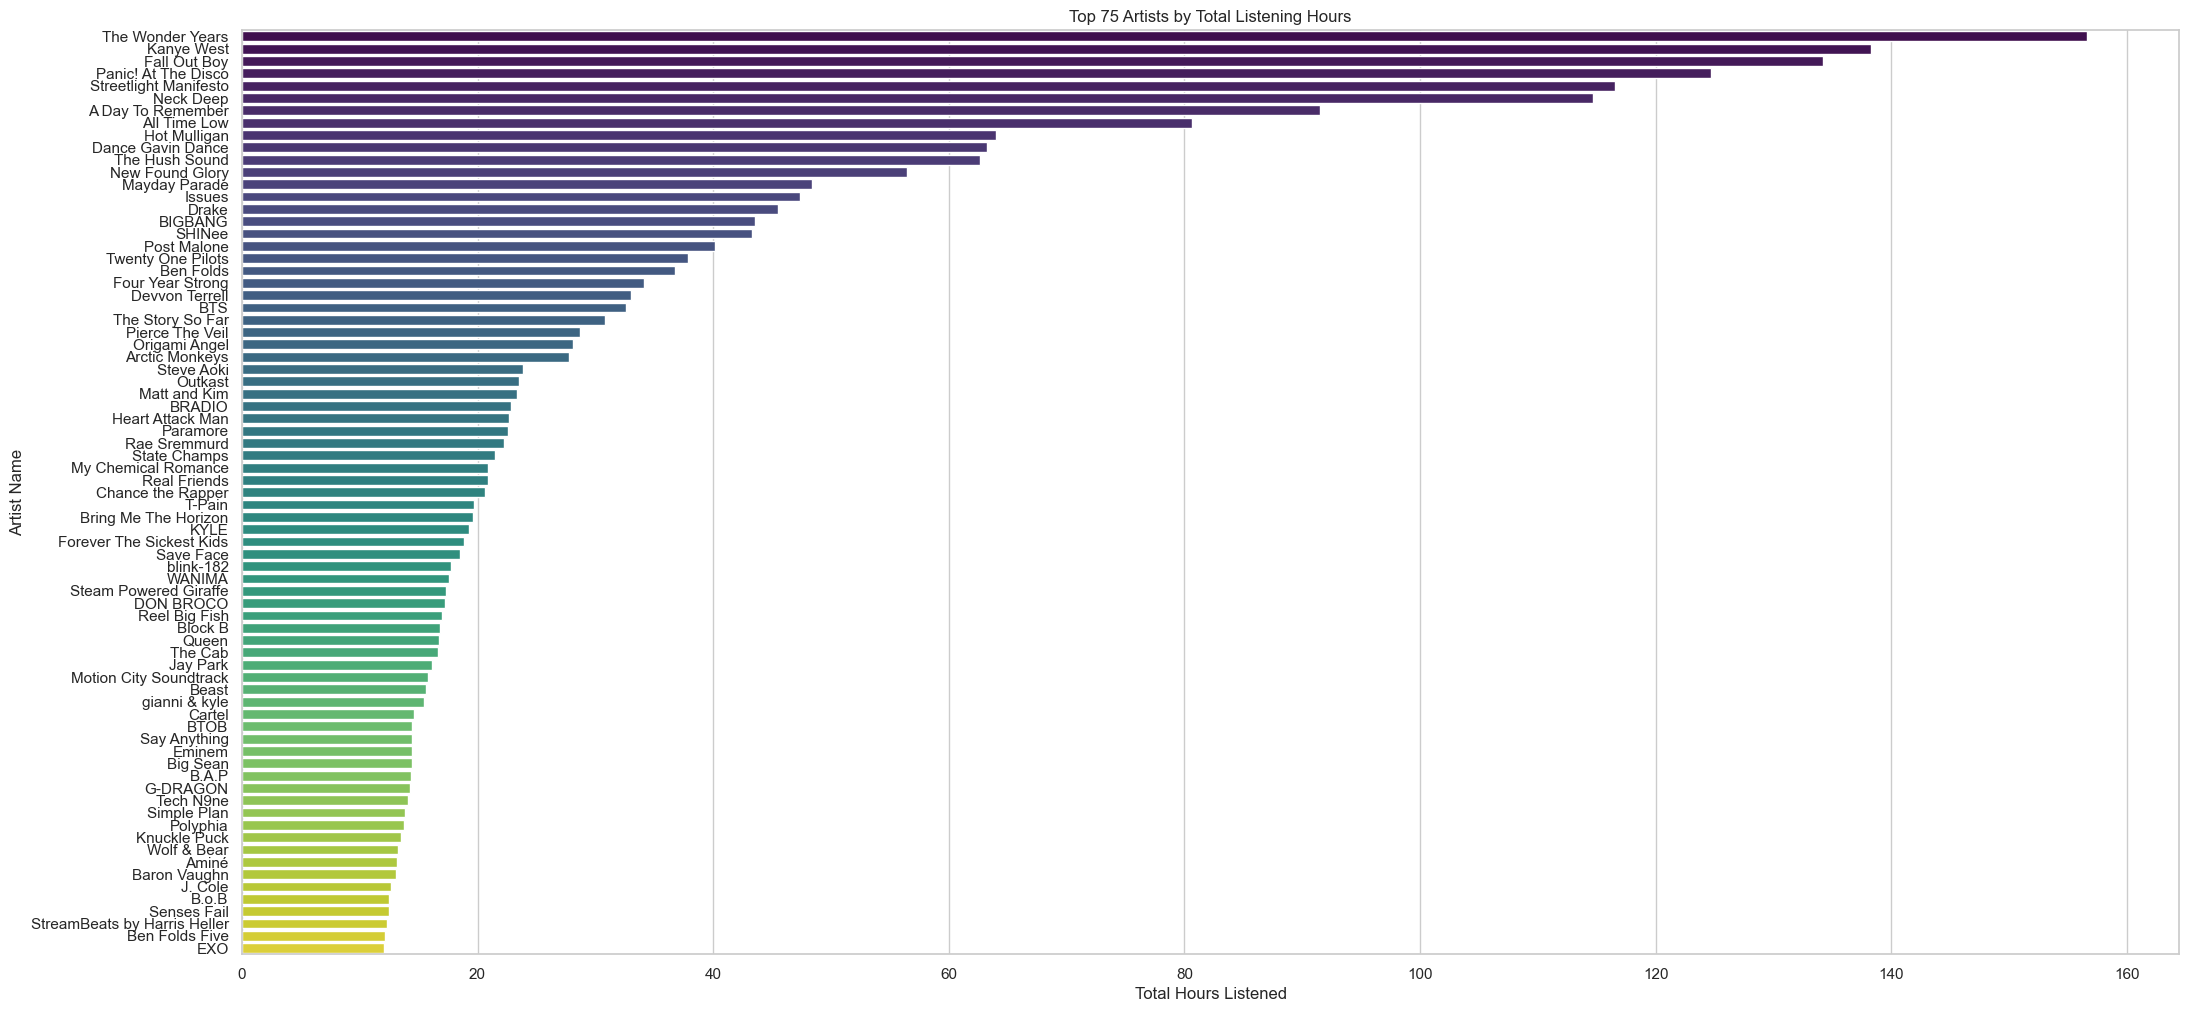

In [36]:
plt.figure(figsize=(25, 12))
top_artists = total_hours_per_artist.sort_values('hours_played', ascending=False).head(75)
sns.barplot(x='hours_played', y='master_metadata_album_artist_name', data=top_artists, palette='viridis')
plt.title('Top 75 Artists by Total Listening Hours')
plt.xlabel('Total Hours Listened')
plt.ylabel('Artist Name')
plt.show()

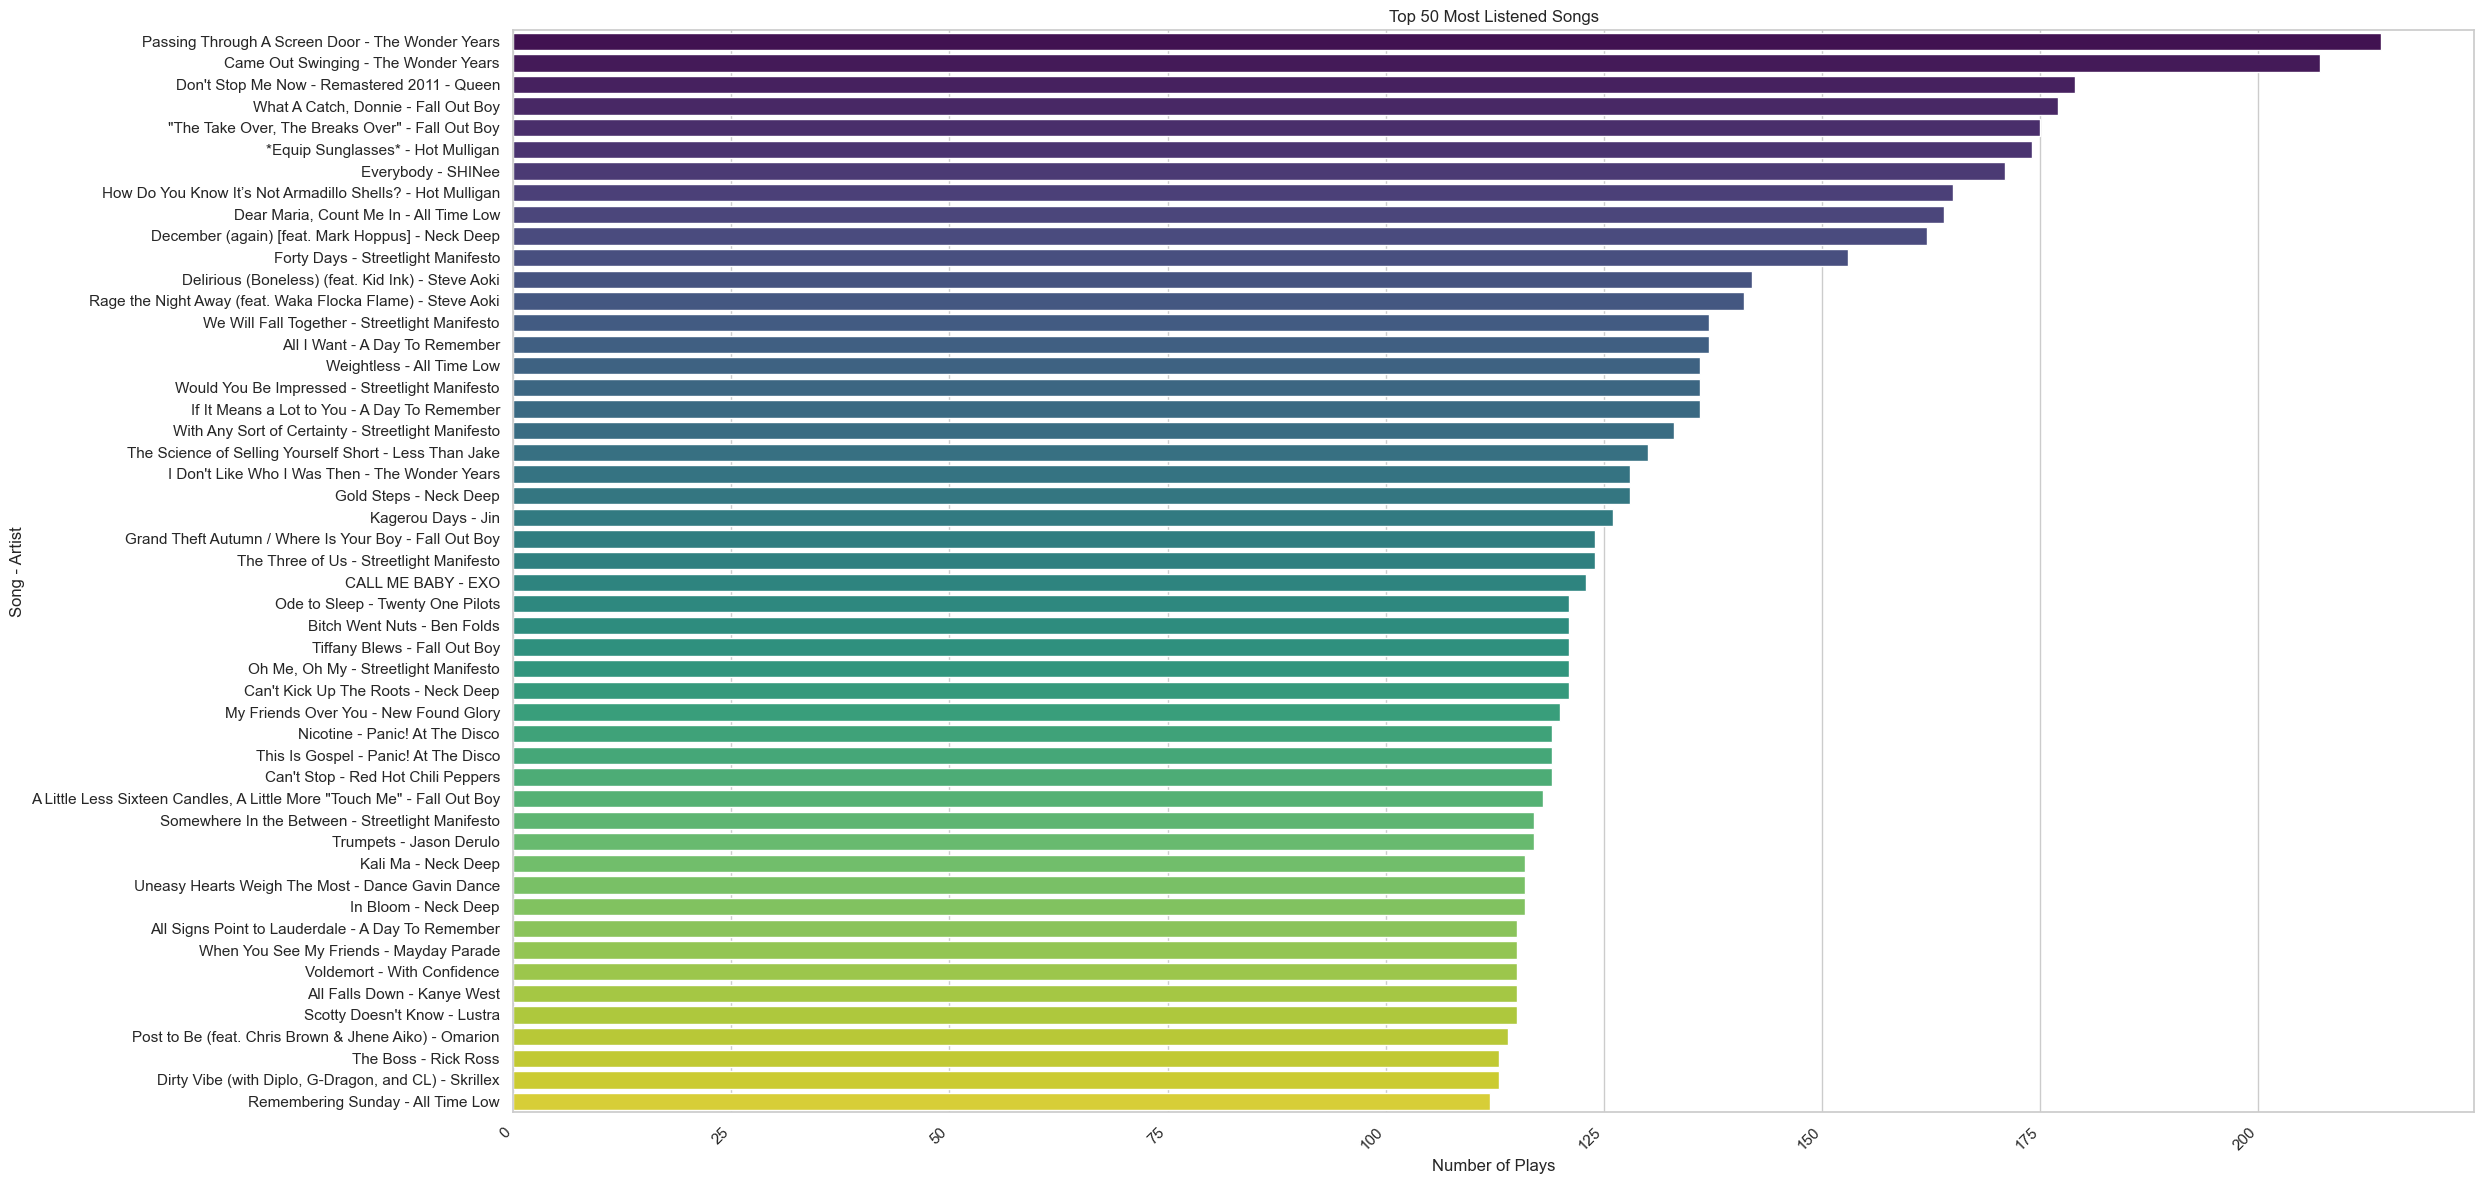

In [37]:
# Create a new column combining song name and artist name
df['song_artist'] = df['master_metadata_track_name'] + ' - ' + df['master_metadata_album_artist_name']

# Get the top 50 most listened songs
top_songs = df['song_artist'].value_counts().head(50)

# Create a bar plot for top songs
plt.figure(figsize=(25,12))
sns.set(style="whitegrid")
sns.barplot(x=top_songs.values, y=top_songs.index, palette='viridis')

# Add title and labels
plt.title('Top 50 Most Listened Songs')
plt.xlabel('Number of Plays')
plt.ylabel('Song - Artist')

# Rotate song labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


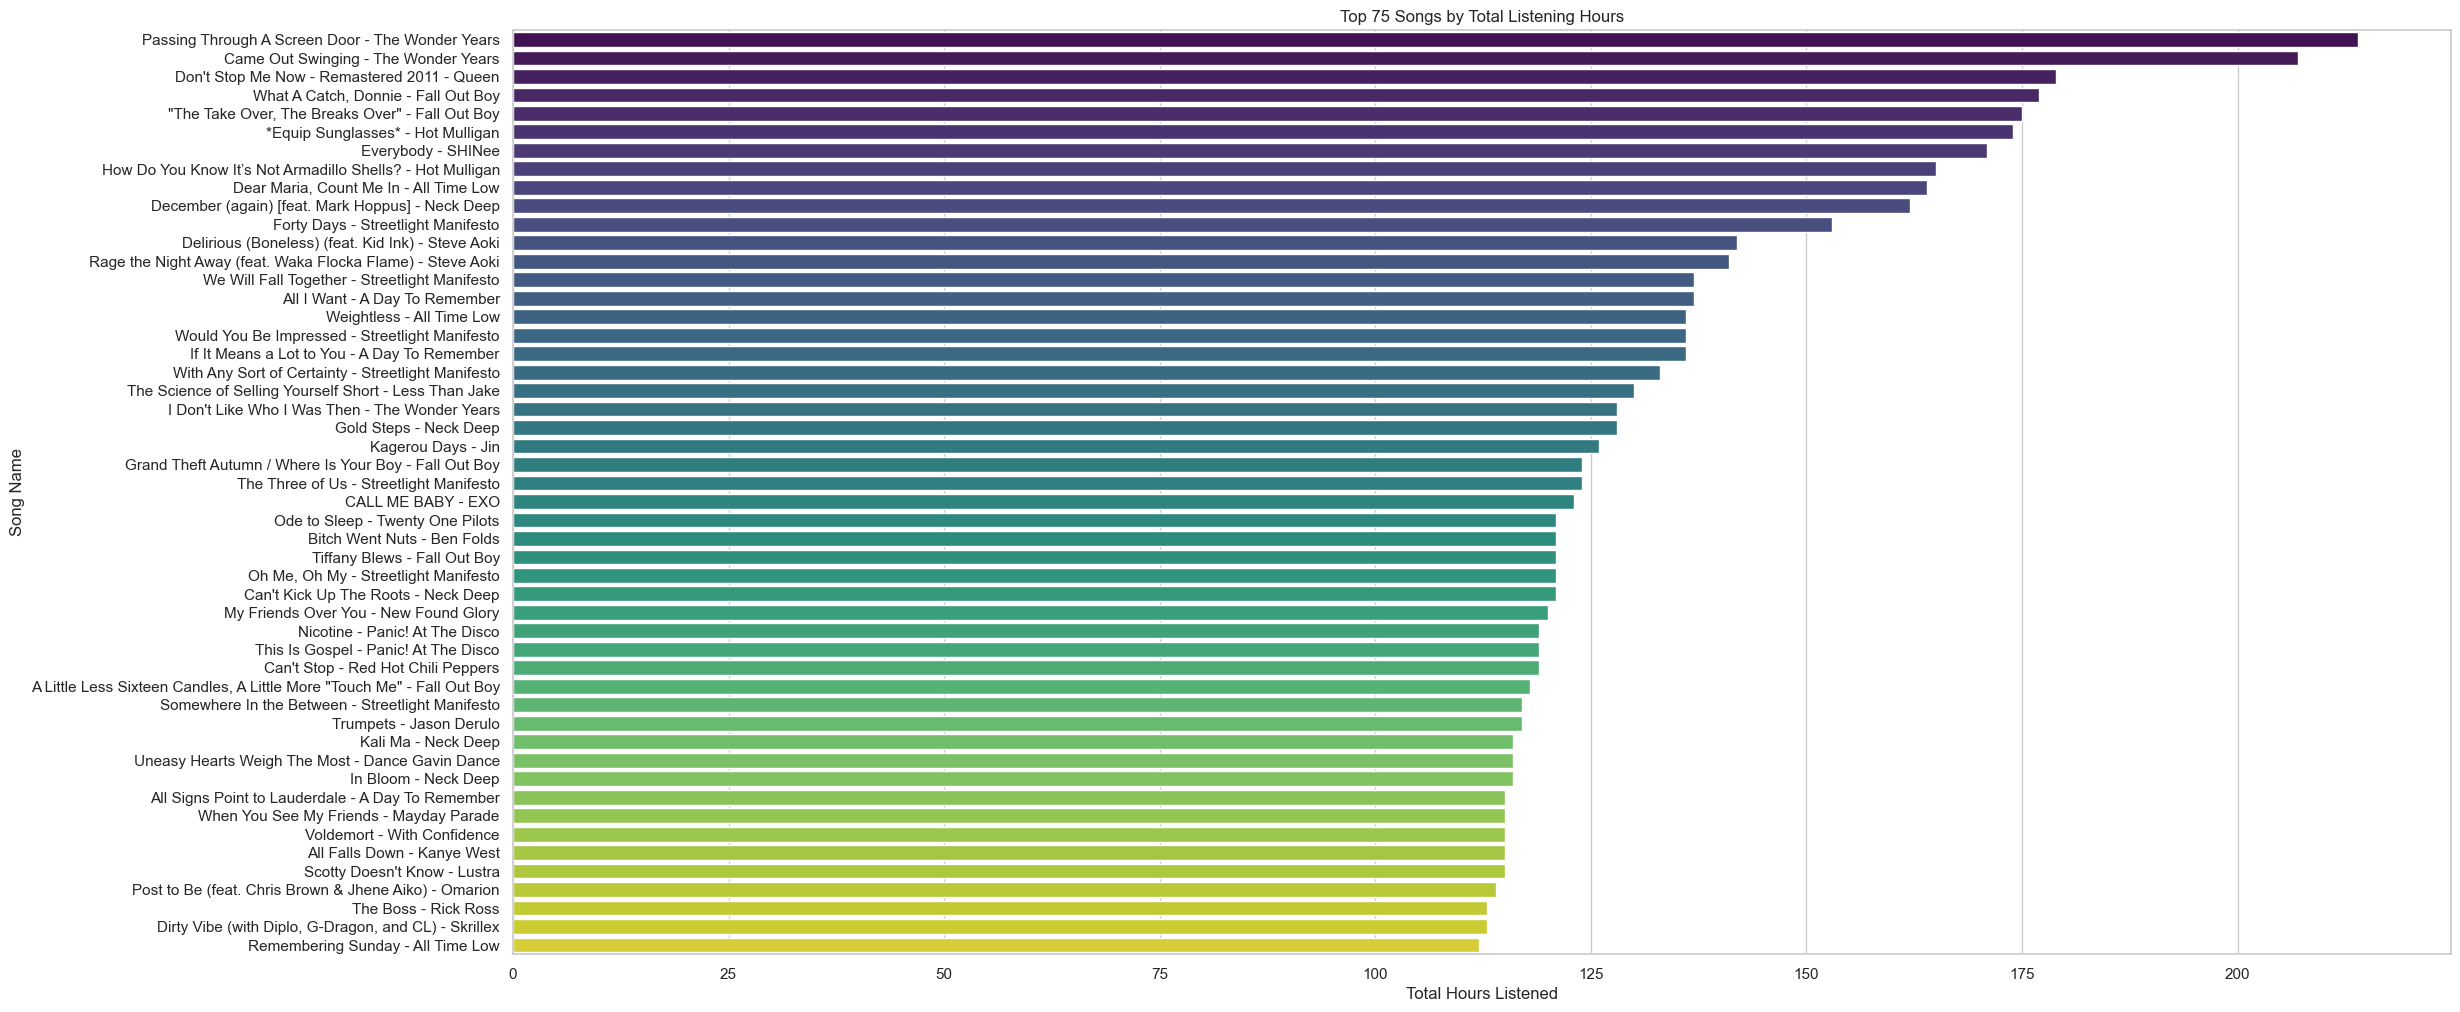

In [38]:
top_songs = df['song_artist'].value_counts().head(50)
plt.figure(figsize=(25, 12))
sns.barplot(x=top_songs.values, y=top_songs.index, palette='viridis')
plt.title('Top 75 Songs by Total Listening Hours')
plt.xlabel('Total Hours Listened')
plt.ylabel('Song Name')
plt.show()

In [39]:
hurricane = df.loc[df['master_metadata_track_name'] == 'Hurricane']
hurricane['master_metadata_album_artist_name'].unique()

array(['Panic! At The Disco', 'The Hush Sound', 'B.A.P', 'MisterWives',
       'Halsey', 'Dayseeker', 'Luke Combs', 'Kanye West'], dtype=object)

In [40]:
df.describe()

,ms_played,seconds_played,hours_played
count,1.393390e+05,139339.000000,139339.000000
mean,1.385504e+05,138.550416,0.038486
std,1.007533e+05,100.753319,0.027987
min,0.000000e+00,0.000000,0.000000
25%,1.676050e+04,16.760500,0.004656
50%,1.731030e+05,173.103000,0.048084
75%,2.136960e+05,213.696000,0.059360
max,1.432510e+06,1432.510000,0.397919


###### 